Ruben Pena  
Wesley McGowan  
Machine Learning  
Classification Project 1  

In [0]:
# Import required packages
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

Using TensorFlow backend.


In [0]:
# Check installed versions of tf and keras
print(tf.__version__)
print(keras.__version__)
#set matplotlib figsize for notebook
plt.rcParams['figure.figsize'] = (10,10)

1.15.0
2.2.4-tf


In [0]:
# Import dataset from tensorflow datasets
dataset = tf.keras.datasets.mnist
print(type(dataset))

<class 'tensorflow.python.util.module_wrapper.TFModuleWrapper'>


In [0]:
# Load data as np arrays and rename data using tf.keras.datasets function
(X_Train,Y_Train),(X_Test,Y_Test) = dataset.load_data()
print(type(X_Train))

<class 'numpy.ndarray'>


In [0]:
# Make copies to be reshaped
X_train = np.copy(X_Train)
Y_train = np.copy(Y_Train)
X_test = np.copy(X_Test)
Y_test = np.copy(Y_Test)

In [0]:
# Check the shapes of train data
X_train.shape,Y_train.shape

((60000, 28, 28), (60000,))

In [0]:
# Check the shape of the test data
X_test.shape,Y_test.shape

((10000, 28, 28), (10000,))

In [0]:
# Check unique values of the training label
print(np.unique(Y_Train,axis = 0))
bigC=list(np.unique(Y_Train,axis = 0))

[0 1 2 3 4 5 6 7 8 9]


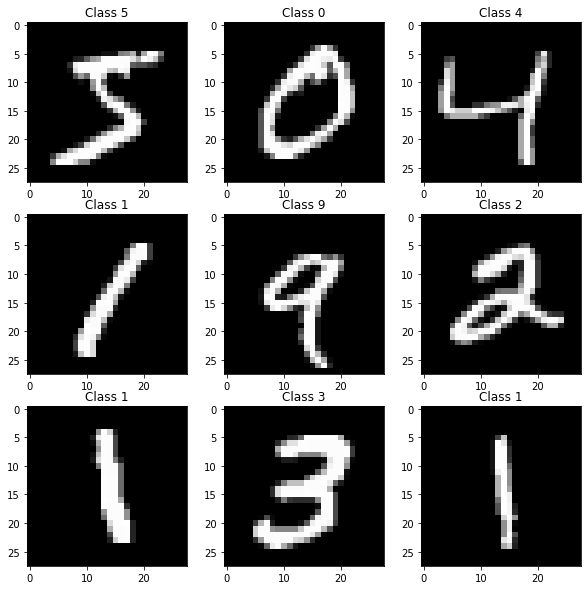

In [0]:
# Check to see if y's match x on a few points
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[i]))

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

# Question 1 (10 pts)   
a) Reshape data to 28*28 = 784-dimensions long (one feature for each pixel in the image). Do not do any scaling or normalization on the pixel values. 

b) Implement a 1-nearest neighbor classifier that considers the image pixels to be one long feature vector. 

c) Present the testing error for each digit in a table.

### Q1(a) Reshape data to *n* by 784

In [0]:
# Check shape of a single data point
X_train[0].shape

(28, 28)

In [0]:
# Reshape copies of data to be a 785 length
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Shape of Training: ", X_train.shape)
print("Shape of Testing: ", X_test.shape)

Shape of Training:  (60000, 784)
Shape of Testing:  (10000, 784)


### Q1(b) Implement n_neighbors = 1 on x784 data



In [0]:
%%time
# Initialize clf using sklearn KNeighbors with 1 nearest neighbor.
k1 = KNeighborsClassifier(n_neighbors=1)
# Fit the classifier using the Training Data and Labels
k1_fit = k1.fit(X_train, Y_train)

CPU times: user 33.5 s, sys: 156 ms, total: 33.6 s
Wall time: 33.7 s


In [0]:
#14m 8s
%%time
# Use the clf to predict on the Test Data
k1_predict = k1.predict(X_test)

CPU times: user 14min 4s, sys: 125 ms, total: 14min 4s
Wall time: 14min 8s


In [0]:
k1_predict

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Q1(c) Present Testing Error for each Class Label

Accuracy for all classes are 94% or above. Error rates for all classes are low.


In [0]:
cm1 = confusion_matrix(Y_test.argmax(axis=1), k1_predict.argmax(axis=1))
cm1

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1129,    3,    0,    1,    1,    1,    0,    0,    0],
       [   7,    6,  992,    5,    1,    0,    2,   16,    3,    0],
       [   0,    1,    2,  970,    1,   19,    0,    7,    7,    3],
       [   0,    7,    0,    0,  944,    0,    3,    5,    1,   22],
       [   1,    1,    0,   12,    2,  860,    5,    1,    6,    4],
       [   4,    2,    0,    0,    3,    5,  944,    0,    0,    0],
       [   0,   14,    6,    2,    4,    0,    0,  992,    0,   10],
       [   6,    1,    3,   14,    5,   13,    3,    4,  920,    5],
       [   2,    5,    1,    6,   10,    5,    1,   11,    1,  967]])

In [0]:
classAcc=pd.DataFrame(cm1.diagonal() / cm1.sum(axis=1))
bigC=pd.DataFrame(bigC)
classAcc
ACC= pd.concat([bigC,classAcc],axis=1)
ACC.columns =  ['Class', 'Accuracy']
ACC

,Class,Accuracy
0,0,0.992857
1,1,0.994714
2,2,0.961240
3,3,0.960396
4,4,0.961303
5,5,0.964126
6,6,0.985386
7,7,0.964981
8,8,0.944559
9,9,0.958375


In [0]:
# checking against classification report
cr1  = classification_report(Y_test, k1_predict)
print(cr1)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000
 samples avg       0.97      0.97      0.97     10000



# Question 2 (10 pts)  
a) Implement a KNN leave-one-out approach and test values of K from 1 to 20.   

b) Plot the leave-one-out error vs. K. 

c) Present the testing error for best value of K for each digit in a table.  

>Note: If you are running into time problems using all 60,000 data points for leave-one-out, feel free to randomly sample the training set to estimate the best K


### Q2(a) Tune over k range(1,21) using Leave-One-Out

Sampling 1000 took far too long. To decrease runtime of notebook a random sample of 250 was chosen.

In [0]:
random.seed(0)
# index for subset of data to test
idx = random.sample(range(1, 10000), 250) 
# create subsets
X_train_loo = X_train[idx]
Y_train_loo = Y_Train[idx]
X_test_loo = X_test[idx]
Y_test_loo = Y_Test[idx]


In [0]:
X_train_loo.shape,Y_train_loo.shape

((1000, 784), (1000,))

In [0]:
X_test_loo.shape,Y_test_loo.shape

((1000, 784), (1000,))

In [0]:
type(X_test_loo)

numpy.ndarray

In [0]:
n21 = range(1,21)
loo = LeaveOneOut()
gs_params = {'n_neighbors': n21}
gsLOO = GridSearchCV(KNeighborsClassifier(),gs_params,verbose = 1,cv = loo,n_jobs = -1)

In [0]:
%%time
gsLOOfit = gsLOO.fit(X_train_loo,Y_train_loo)

Fitting 500 folds for each of 20 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 722 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 1722 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 3122 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4922 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 7122 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 9722 tasks      | elapsed:  3.4min


CPU times: user 11.5 s, sys: 571 ms, total: 12.1 s
Wall time: 3min 32s


[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:  3.5min finished


In [0]:
# Best Estimator k=1
gsLOOfit.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
# Predict trained model on best K
%%time
gsLOOpred = gsLOOfit.best_estimator_.predict(X_test_loo)

CPU times: user 405 ms, sys: 0 ns, total: 405 ms
Wall time: 412 ms


In [0]:
#gsLOOpred

array([8, 1, 8, 6, 6, 9, 2, 7, 6, 5, 3, 3, 4, 6, 6, 7, 1, 1, 8, 6, 5, 4,
       0, 6, 5, 1, 7, 0, 8, 8, 5, 1, 6, 6, 9, 6, 4, 7, 6, 1, 6, 7, 4, 3,
       0, 7, 5, 0, 6, 9, 8, 3, 1, 9, 1, 1, 2, 0, 6, 9, 7, 7, 3, 3, 3, 3,
       0, 5, 0, 6, 2, 2, 2, 0, 6, 5, 7, 0, 4, 7, 0, 0, 7, 7, 7, 5, 9, 8,
       1, 4, 8, 4, 5, 0, 9, 0, 1, 7, 7, 9], dtype=uint8)

### Q2(b) Plot Leave-One-Out error vs. K

It can be seen in the figure below that as *k* increases accuracy of prediction generally decreases.

In [0]:
results1 = pd.DataFrame(gsLOOfit.cv_results_).loc[:, ['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
results1.index += 1
results1['k'] = results1.index
results1 = results1[['k', 'mean_test_score']]
results1.columns = ['k','Mean Test Score']
results1.index = np.arange(1, len(results1)+1)

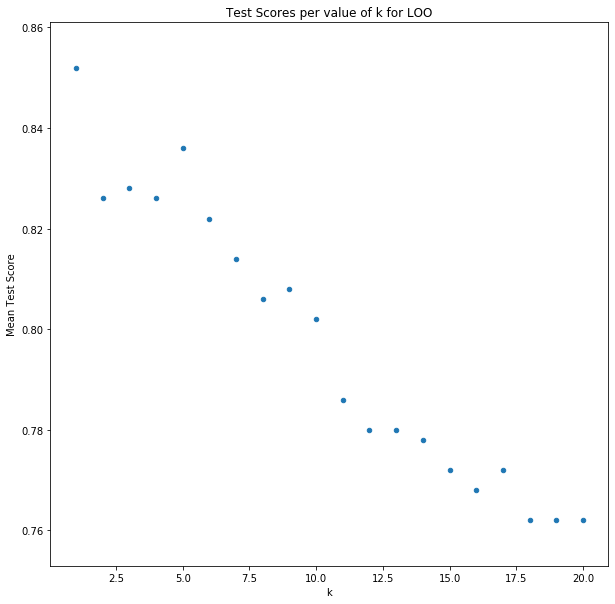

In [0]:
results1.plot(x='k',y='Mean Test Score',kind='scatter',title='Test Scores per value of k for LOO')

### Q2(c) Present test error for best K

Based on the results of the LOO using GridSearch for k 1-20; k=1 performed the best on this subset of 100 samples of the data with a mean accuracy of 85.2% or an error rate of 19%.

The LOO over the GridSearchCV performed significantly better than the original k=1 classifier.

In [0]:
#Print CV Test Scores
results1

,k,Mean Test Score
1,1,0.852
2,5,0.836
3,3,0.828
4,2,0.826
5,4,0.826
6,6,0.822
7,7,0.814
8,9,0.808
9,8,0.806
10,10,0.802


Accuracy of k=1 for all classes shows that the classifier performed above 70%.

In [0]:
# Get class accuracy for k=1
# Confusion Matrix to calculate class accuracy
cm2 = confusion_matrix(Y_test_loo,gsLOOpred)
classAcc2=pd.DataFrame(cm2.diagonal() / cm2.sum(axis=1))
bigC=pd.DataFrame(bigC)
classAcc2
ACC2= pd.concat([bigC,classAcc2],axis=1)
ACC2.columns =  ['Class', 'Accuracy']
ACC2

,Class,Accuracy
0,0,0.933333
1,1,1.000000
2,2,0.741379
3,3,0.818182
4,4,0.795455
5,5,0.820000
6,6,0.903226
7,7,0.711111
8,8,0.739130
9,9,0.772727


# Question 3 (20 pts)  
a) Implement a function that downsamples the image by a factor of *n*.  
>For example, if *n* is 4 then you will sample every 4th pixel (feature) in the 784-dimension feature vector. 

b) Repeat the KNN leave-one-out experiment with at least 4 different values of *n*. 

c) Comment on the testing results and the query time of the classifier.



### Q3(a) Implement a function that downsamples by a factor of n

In [0]:
def downample(data,n):
  index = [i-1 for i in np.arange(n, data.shape[1] + 1, n)]
  down_sampled = np.array([data[:, i] for i in index])
  return down_sampled.T

In [0]:
xTrain_2 = downample(X_train_loo,2)
xTest_2 = downample(X_test_loo,2)
xTrain_2.shape, xTest_2.shape,Y_train_loo.shape,Y_test_loo.shape

((250, 392), (250, 392), (250,), (250,))

In [0]:
xTrain_4 = downample(X_train_loo,4)
xTest_4 = downample(X_test_loo,4)
xTrain_4.shape, xTest_4.shape,Y_train_loo.shape,Y_test_loo.shape

((250, 196), (250, 196), (250,), (250,))

In [0]:
xTrain_6 = downample(X_train_loo,6)
xTest_6 = downample(X_test_loo,6)
xTrain_6.shape, xTest_6.shape,Y_train_loo.shape,Y_test_loo.shape

((250, 130), (250, 130), (250,), (250,))

In [0]:
xTrain_8 = downample(X_train_loo,8)
xTest_8 = downample(X_test_loo,8)
xTrain_8.shape, xTest_8.shape,Y_train_loo.shape,Y_test_loo.shape

((250, 98), (250, 98), (250,), (250,))

### Q3(b) Repeat k-NN LOO over 4 values of *n* (2,4,6,8)


## Downsample n=2

In [0]:
%%time
gs2LOO_fit = gsLOO.fit(xTrain_2, Y_train_loo)

Fitting 250 folds for each of 20 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:   16.4s


CPU times: user 3.93 s, sys: 145 ms, total: 4.08 s
Wall time: 27.7 s


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   27.6s finished


In [0]:
# Best Estimator k=1
gs2LOO_fit.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
# Predict trained model on best K
%%time
gs2LOOpred = gs2LOO_fit.best_estimator_.predict(xTest_2)

CPU times: user 55.8 ms, sys: 3 ms, total: 58.8 ms
Wall time: 61.4 ms


In [0]:
results2 = pd.DataFrame(gs2LOO_fit.cv_results_).loc[:, ['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
results2.index += 1
results2['k'] = results2.index
results2 = results2[['k', 'mean_test_score']]
results2.columns = ['k','Mean Test Score']
results2.index = np.arange(1, len(results2)+1)

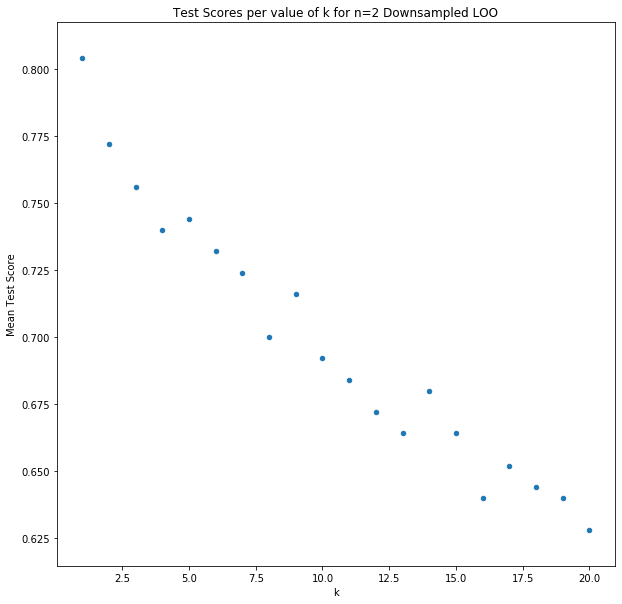

In [0]:
results2.plot(x='k',y='Mean Test Score',kind='scatter',title='Test Scores per value of k for n=2 Downsampled LOO')

In [0]:
results2

,k,Mean Test Score
1,1,0.804
2,2,0.772
3,3,0.756
4,5,0.744
5,4,0.740
6,6,0.732
7,7,0.724
8,9,0.716
9,8,0.700
10,10,0.692


In [0]:
cm_down2 = confusion_matrix(Y_test_loo,gs2LOOpred)
# Get class accuracy for downsample n=2
down2Acc=pd.DataFrame(cm_down2.diagonal() / cm_down2.sum(axis=1))
ACCdown2 = pd.concat([bigC,down2Acc],axis=1)
ACCdown2.columns =  ['Class', 'Accuracy']
ACCdown2

,Class,Accuracy
0,0,0.952381
1,1,1.000000
2,2,0.739130
3,3,0.757576
4,4,0.750000
5,5,0.565217
6,6,0.868421
7,7,0.739130
8,8,0.782609
9,9,0.722222


**n=2 Results**   
**Best k: 1**  
**Mean Accuracy for best k: 80.4**  
**Execution Time of GridSearch: 27.6s** 

## Downsample n=4

In [0]:
%%time
gs4LOO_fit = gsLOO.fit(xTrain_4, Y_train_loo)

Fitting 250 folds for each of 20 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.2s


CPU times: user 3.56 s, sys: 93.8 ms, total: 3.65 s
Wall time: 19.1 s


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   19.1s finished


In [0]:
# Best Estimator k=1
gs4LOO_fit.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
%%time
gs4LOOpred = gs4LOO_fit.best_estimator_.predict(xTest_4)

CPU times: user 36.3 ms, sys: 998 µs, total: 37.3 ms
Wall time: 40.8 ms


In [0]:
results4 = pd.DataFrame(gs4LOO_fit.cv_results_).loc[:, ['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
results4.index += 1
results4['k'] = results4.index
results4 = results4[['k', 'mean_test_score']]
results4.columns = ['k','Mean Test Score']
results4.index = np.arange(1, len(results4)+1)

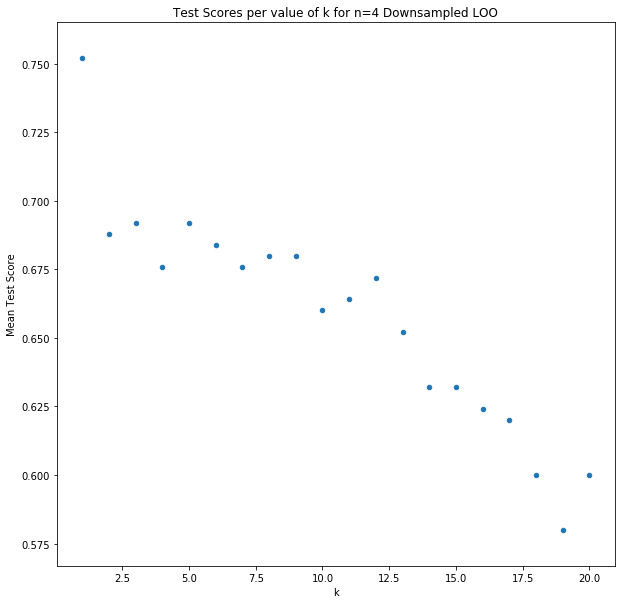

In [0]:
results4.plot(x='k',y='Mean Test Score',kind='scatter',title='Test Scores per value of k for n=4 Downsampled LOO')

In [0]:
results4

,k,Mean Test Score
1,1,0.752
2,3,0.692
3,5,0.692
4,2,0.688
5,6,0.684
6,8,0.680
7,9,0.680
8,4,0.676
9,7,0.676
10,12,0.672


In [0]:
cm_down4 = confusion_matrix(Y_test_loo,gs4LOOpred)
# Get class accuracy for downsample n=2
down4Acc=pd.DataFrame(cm_down4.diagonal() / cm_down4.sum(axis=1))
ACCdown4 = pd.concat([bigC,down4Acc],axis=1)
ACCdown4.columns =  ['Class', 'Accuracy']
ACCdown4

,Class,Accuracy
0,0,1.000000
1,1,1.000000
2,2,0.652174
3,3,0.575758
4,4,0.625000
5,5,0.521739
6,6,0.763158
7,7,0.695652
8,8,0.608696
9,9,0.666667


**n=4 Results**   
**Best k: 1**  
**Mean Accuracy for best k: 75.2**  
**Execution Time of GridSearch: 19.1s** 

## Downsample n=6


In [0]:
%%time
gs6LOO_fit = gsLOO.fit(xTrain_6, Y_train_loo)

Fitting 250 folds for each of 20 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:    2.3s


CPU times: user 3.55 s, sys: 48.9 ms, total: 3.6 s
Wall time: 14.9 s


[Parallel(n_jobs=-1)]: Done 4997 out of 5000 | elapsed:   14.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   14.9s finished


In [0]:
gs6LOO_fit.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
%%time
gs6LOOpred = gs6LOO_fit.best_estimator_.predict(xTest_6)

CPU times: user 31.9 ms, sys: 2.99 ms, total: 34.9 ms
Wall time: 34.2 ms


In [0]:
results6 = pd.DataFrame(gs6LOO_fit.cv_results_).loc[:, ['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
results6.index += 1
results6['k'] = results6.index
results6 = results6[['k', 'mean_test_score']]
results6.columns = ['k','Mean Test Score']
results6.index = np.arange(1, len(results6)+1)

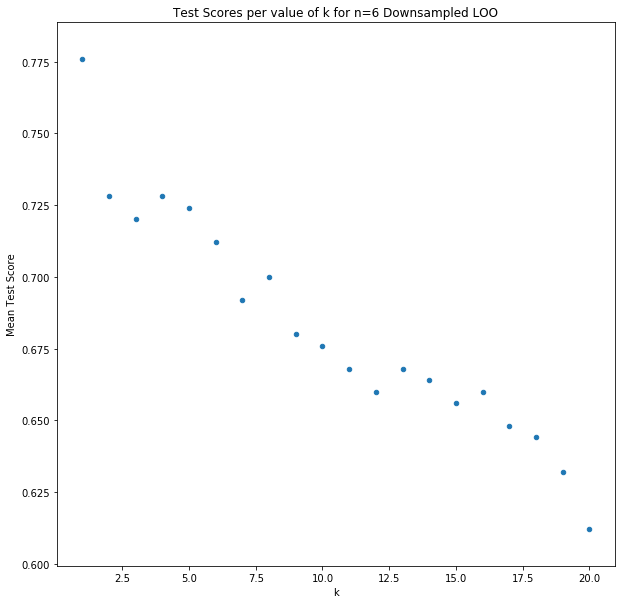

In [0]:
results6.plot(x='k',y='Mean Test Score',kind='scatter',title='Test Scores per value of k for n=6 Downsampled LOO')

In [0]:
results6

,k,Mean Test Score
1,1,0.776
2,2,0.728
3,4,0.728
4,5,0.724
5,3,0.720
6,6,0.712
7,8,0.700
8,7,0.692
9,9,0.680
10,10,0.676


In [0]:
cm_down6 = confusion_matrix(Y_test_loo,gs6LOOpred)
# Get class accuracy for downsample n=2
down6Acc=pd.DataFrame(cm_down6.diagonal() / cm_down6.sum(axis=1))
ACCdown6 = pd.concat([bigC,down6Acc],axis=1)
ACCdown6.columns =  ['Class', 'Accuracy']
ACCdown6

,Class,Accuracy
0,0,0.952381
1,1,1.000000
2,2,0.608696
3,3,0.727273
4,4,0.791667
5,5,0.521739
6,6,0.868421
7,7,0.739130
8,8,0.739130
9,9,0.722222


**n=6 Results**   
**Best k: 1**  
**Mean Accuracy for best k: 77.6**  
**Execution Time of GridSearch: 14.9s** 

## Downsample n=8

In [0]:
%%time
gs8LOO_fit = gsLOO.fit(xTrain_8, Y_train_loo)

Fitting 250 folds for each of 20 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    2.6s


CPU times: user 3.71 s, sys: 51.4 ms, total: 3.76 s
Wall time: 13.6 s


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   13.6s finished


In [0]:
gs8LOO_fit.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
%%time
gs8LOOpred = gs8LOO_fit.best_estimator_.predict(xTest_8)

CPU times: user 26.1 ms, sys: 994 µs, total: 27.1 ms
Wall time: 32.1 ms


In [0]:
results8 = pd.DataFrame(gs8LOO_fit.cv_results_).loc[:, ['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
results8.index += 1
results8['k'] = results8.index
results8 = results8[['k', 'mean_test_score']]
results8.columns = ['k','Mean Test Score']
results8.index = np.arange(1, len(results8)+1)

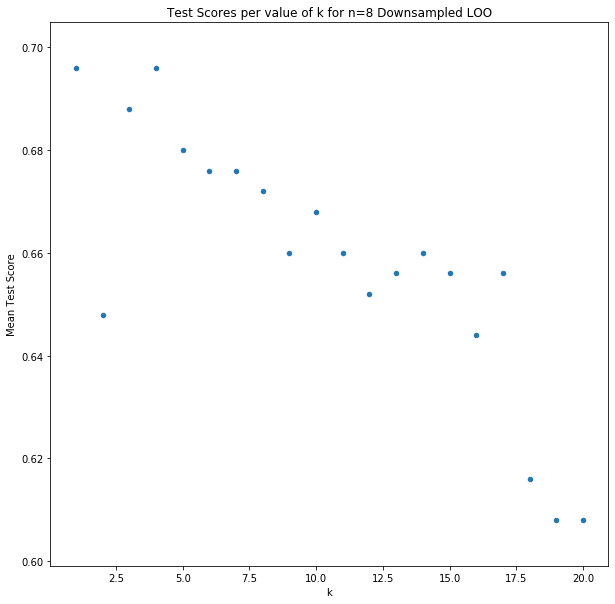

In [0]:
results8.plot(x='k',y='Mean Test Score',kind='scatter',title='Test Scores per value of k for n=8 Downsampled LOO')

In [0]:
results8

,k,Mean Test Score
1,1,0.696
2,4,0.696
3,3,0.688
4,5,0.680
5,6,0.676
6,7,0.676
7,8,0.672
8,10,0.668
9,9,0.660
10,11,0.660


In [0]:
cm_down8 = confusion_matrix(Y_test_loo,gs8LOOpred)
# Get class accuracy for downsample n=2
down8Acc=pd.DataFrame(cm_down8.diagonal() / cm_down8.sum(axis=1))
ACCdown8 = pd.concat([bigC,down8Acc],axis=1)
ACCdown8.columns =  ['Class', 'Accuracy']
ACCdown8

,Class,Accuracy
0,0,1.000000
1,1,1.000000
2,2,0.652174
3,3,0.545455
4,4,0.625000
5,5,0.521739
6,6,0.763158
7,7,0.521739
8,8,0.739130
9,9,0.611111


**n=8 Results**   
**Best k: 1 and 4 tied**  
**Mean Accuracy for best k: 69.6**  
**Execution Time of GridSearch: 13.6s** 

### Q3(c) Comment on the testing results and the query time of the clf

Based on the results of running the classifier with different downsampled sizes, it appears that as the downsampling factor increased both time to execute and predictive accuracy decreased making this method questionable using larger factors of downsampling.

n=2 downsampling was by far the most optimal as it sacrificed less accuracy, but also cut execution time to something more managable for this large dataset.

# Question 4(20 pts) 
a) Implement a function that smart downsamples the image by binning nearby pixels. 
>For example, if n is 4 then the 28x28 image will be binned down to a 7x7 image by summing each 4x4 block in the image. 

b) Repeat the KNN leave-one-out experiment with at least 4 different values of n.

c) Comment on the testing results and the query time of the classifier.

### Q4(a) Downsample via binning

In [0]:
# Smart downsampling via binning using strides to traverse arrays
def sum_strided_rescale(data, bin_fac):
  # Get the strides of the whole image
  strided = np.lib.stride_tricks.as_strided(data,shape=(data.shape[0]//bin_fac,data.shape[1]//bin_fac, bin_fac, bin_fac),strides=((data.strides[0]*bin_fac, data.strides[1]*bin_fac)+data.strides))
  return strided.sum(axis=-1).sum(axis=-1)
def binning(data,n):
  new_side = int(data.shape[1] / n)
  strided = np.zeros((data.shape[0], new_side, new_side))
  for i in range(data.shape[0]):
      strided[i] = sum_strided_rescale(data[i], n)
  return strided

In [0]:
X_Train.shape

(60000, 28, 28)

In [0]:
# subset original data with 28x28
# idx = 100 samples (idx = random.sample(range(1, 10000), 100))
X_train_q4 = X_Train[idx]
Y_train_q4 = Y_Train[idx]
X_test_q4 = X_Test[idx]
Y_test_q4 = Y_Test[idx]

In [0]:
X_train_q4.shape,Y_train_q4.shape

((250, 28, 28), (250,))

In [0]:
X_test_q4.shape,Y_test_q4.shape

((250, 28, 28), (250,))

In [0]:
# 2 bins using sum of blocks
xTrain_bin2 = binning(X_train_q4,2)
xTest_bin2 = binning(X_test_q4,2)
xTrain_bin2.shape, xTest_bin2.shape,Y_train_q4.shape,Y_test_q4.shape

((250, 14, 14), (250, 14, 14), (250,), (250,))

In [0]:
# Reshape 2 bins
xTrain_bin2 = xTrain_bin2.reshape(250, 196)
xTest_bin2 = xTest_bin2.reshape(250, 196)
xTrain_bin2 = xTrain_bin2.astype('float32')
xTest_bin2 = xTest_bin2.astype('float32')
xTrain_bin2 /= 255
xTest_bin2 /= 255
print("Shape of Training using 2 bins: ", xTrain_bin2.shape)
print("Shape of Testing using 2 bins: ", xTest_bin2.shape)

Shape of Training using 2 bins:  (250, 196)
Shape of Testing using 2 bins:  (250, 196)


In [0]:
# 4 bins using sum of blocks
xTrain_bin4 = binning(X_train_q4,4)
xTest_bin4 = binning(X_test_q4,4)
xTrain_bin4.shape, xTest_bin4.shape,Y_train_q4.shape,Y_test_q4.shape

((250, 7, 7), (250, 7, 7), (250,), (250,))

In [0]:
# Reshape 4 bins
xTrain_bin4 = xTrain_bin4.reshape(250, 49)
xTest_bin4 = xTest_bin4.reshape(250, 49)
xTrain_bin4 = xTrain_bin4.astype('float32')
xTest_bin4 = xTest_bin4.astype('float32')
xTrain_bin4 /= 255
xTest_bin4 /= 255
print("Shape of Training using 4 bins: ", xTrain_bin4.shape)
print("Shape of Testing using 4: ", xTest_bin4.shape)

Shape of Training using 4 bins:  (250, 49)
Shape of Testing using 4:  (250, 49)


In [0]:
# 6 bins using sum of blocks
xTrain_bin6 = binning(X_train_q4,6)
xTest_bin6 = binning(X_test_q4,6)
xTrain_bin6.shape, xTest_bin6.shape,Y_train_q4.shape,Y_test_q4.shape

((250, 4, 4), (250, 4, 4), (250,), (250,))

In [0]:
# Reshape 6 bins
xTrain_bin6 = xTrain_bin6.reshape(250, 16)
xTest_bin6 = xTest_bin6.reshape(250, 16)
xTrain_bin6 = xTrain_bin6.astype('float32')
xTest_bin6 = xTest_bin6.astype('float32')
xTrain_bin6 /= 255
xTest_bin6 /= 255
print("Shape of Training using 6 bins: ", xTrain_bin6.shape)
print("Shape of Testing using 6 bins: ", xTest_bin6.shape)

Shape of Training using 6 bins:  (250, 16)
Shape of Testing using 6 bins:  (250, 16)


In [0]:
# 8 bins using sum of blocks
xTrain_bin8 = binning(X_train_q4,8)
xTest_bin8 = binning(X_test_q4,8)
xTrain_bin8.shape, xTest_bin8.shape,Y_train_q4.shape,Y_test_q4.shape

((250, 3, 3), (250, 3, 3), (250,), (250,))

In [0]:
# Reshape 8 bins
xTrain_bin8 = xTrain_bin8.reshape(250, 9)
xTest_bin8 = xTest_bin8.reshape(250, 9)
xTrain_bin8 = xTrain_bin8.astype('float32')
xTest_bin8 = xTest_bin8.astype('float32')
xTrain_bin8 /= 255
xTest_bin8 /= 255
print("Shape of Training using 8 bins: ", xTrain_bin8.shape)
print("Shape of Testing using 8 bins: ", xTest_bin8.shape)

Shape of Training using 8 bins:  (250, 9)
Shape of Testing using 8 bins:  (250, 9)


### Q4(b) Repeat k-NN LOO over 4 values of *n* (2,4,6,8)

## Binning n=2

In [0]:
%%time
gs2Bins_fit = gsLOO.fit(xTrain_bin2,Y_train_q4)

Fitting 250 folds for each of 20 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    3.6s


CPU times: user 3.56 s, sys: 50.7 ms, total: 3.61 s
Wall time: 18.1 s


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   18.1s finished


In [0]:
gs2Bins_fit.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
%%time
gs2Binspred = gs2Bins_fit.best_estimator_.predict(xTest_bin2)

CPU times: user 39.1 ms, sys: 7 µs, total: 39.1 ms
Wall time: 39.1 ms


In [0]:
results2Bins = pd.DataFrame(gs2Bins_fit.cv_results_).loc[:, ['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
results2Bins.index += 1
results2Bins['k'] = results2Bins.index
results2Bins = results2Bins[['k', 'mean_test_score']]
results2Bins.columns = ['k','Mean Test Score']
results2Bins.index = np.arange(1, len(results2Bins)+1)

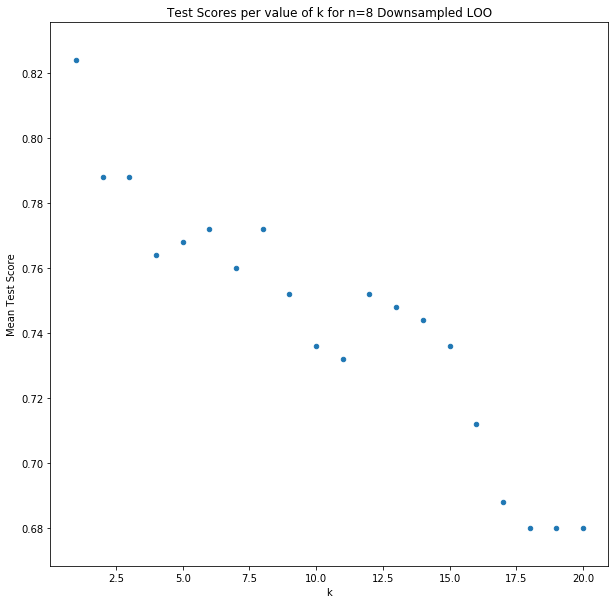

In [0]:
results2Bins.plot(x='k',y='Mean Test Score',kind='scatter',title='Test Scores per value of k for n=8 Downsampled LOO')

In [0]:
results2Bins

,k,Mean Test Score
1,1,0.824
2,2,0.788
3,3,0.788
4,6,0.772
5,8,0.772
6,5,0.768
7,4,0.764
8,7,0.760
9,9,0.752
10,12,0.752


In [0]:
cm_bin2 = confusion_matrix(Y_test_q4,gs2Binspred)
# Get class accuracy for downsample n=2
bin2Acc=pd.DataFrame(cm_bin2.diagonal() / cm_bin2.sum(axis=1))
ACCbin2 = pd.concat([bigC,bin2Acc],axis=1)
ACCbin2.columns =  ['Class', 'Accuracy']
ACCbin2

,Class,Accuracy
0,0,0.952381
1,1,1.000000
2,2,0.739130
3,3,0.696970
4,4,0.666667
5,5,0.695652
6,6,0.921053
7,7,0.782609
8,8,0.913043
9,9,0.777778


## Binning n=4

In [0]:
%%time
gs4Bins_fit = gsLOO.fit(xTrain_bin4,Y_train_q4)

Fitting 250 folds for each of 20 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    3.8s


CPU times: user 3.45 s, sys: 28 ms, total: 3.48 s
Wall time: 10.8 s


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   10.8s finished


In [0]:
gs4Bins_fit.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
%%time
gs4Binspred = gs4Bins_fit.best_estimator_.predict(xTest_bin4)

CPU times: user 16.6 ms, sys: 3 ms, total: 19.6 ms
Wall time: 20.6 ms


In [0]:
results4Bins = pd.DataFrame(gs4Bins_fit.cv_results_).loc[:, ['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
results4Bins.index += 1
results4Bins['k'] = results4Bins.index
results4Bins = results4Bins[['k', 'mean_test_score']]
results4Bins.columns = ['k','Mean Test Score']
results4Bins.index = np.arange(1, len(results4Bins)+1)

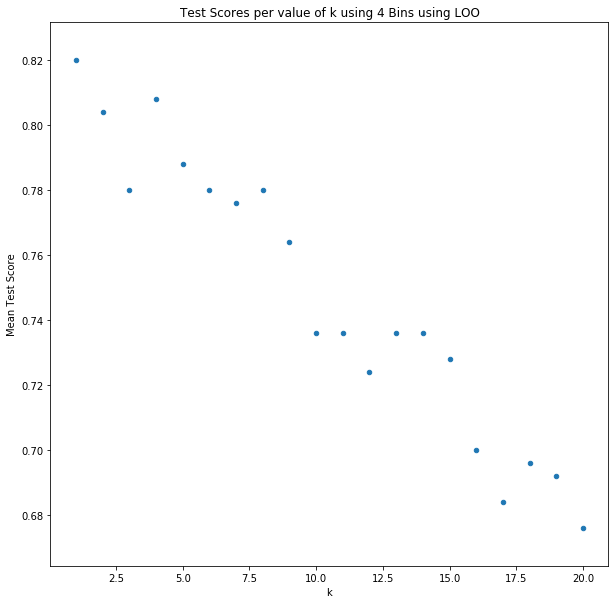

In [0]:
results4Bins.plot(x='k',y='Mean Test Score',kind='scatter',title='Test Scores per value of k using 4 Bins using LOO')

In [0]:
results4Bins

,k,Mean Test Score
1,1,0.820
2,4,0.808
3,2,0.804
4,5,0.788
5,3,0.780
6,6,0.780
7,8,0.780
8,7,0.776
9,9,0.764
10,14,0.736


In [0]:
cm_bin4 = confusion_matrix(Y_test_q4,gs4Binspred)
# Get class accuracy for downsample n=2
bin4Acc=pd.DataFrame(cm_bin4.diagonal() / cm_bin4.sum(axis=1))
ACCbin4 = pd.concat([bigC,bin4Acc],axis=1)
ACCbin4.columns =  ['Class', 'Accuracy']
ACCbin4

,Class,Accuracy
0,0,0.904762
1,1,1.000000
2,2,0.739130
3,3,0.636364
4,4,0.583333
5,5,0.652174
6,6,0.868421
7,7,0.739130
8,8,0.869565
9,9,0.777778


## Binning n=6

In [0]:
%%time
gs6Bins_fit = gsLOO.fit(xTrain_bin6,Y_train_q4)

Fitting 250 folds for each of 20 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    3.2s


CPU times: user 3.51 s, sys: 23 ms, total: 3.54 s
Wall time: 9.22 s


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    9.2s finished


In [0]:
gs6Bins_fit.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
%%time
gs6Binspred = gs6Bins_fit.best_estimator_.predict(xTest_bin6)

CPU times: user 17.5 ms, sys: 3.99 ms, total: 21.5 ms
Wall time: 21.9 ms


In [0]:
results6Bins = pd.DataFrame(gs6Bins_fit.cv_results_).loc[:, ['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
results6Bins.index += 1
results6Bins['k'] = results6Bins.index
results6Bins = results6Bins[['k', 'mean_test_score']]
results6Bins.columns = ['k','Mean Test Score']
results6Bins.index = np.arange(1, len(results6Bins)+1)

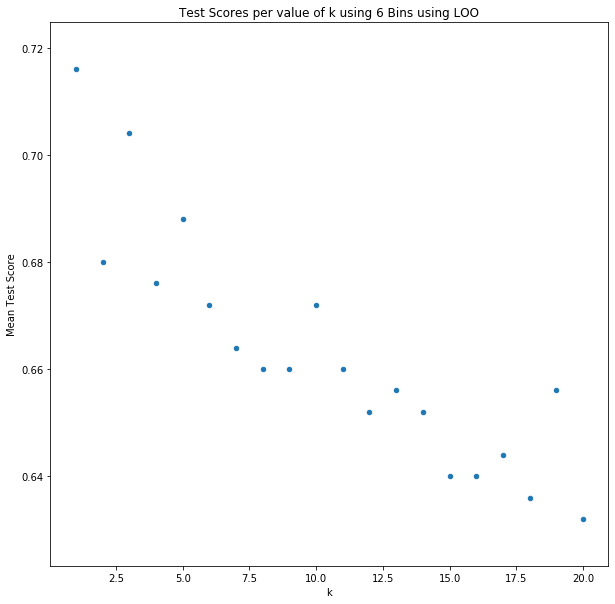

In [0]:
results6Bins.plot(x='k',y='Mean Test Score',kind='scatter',title='Test Scores per value of k using 6 Bins using LOO')

In [0]:
results6Bins

,k,Mean Test Score
1,1,0.716
2,3,0.704
3,5,0.688
4,2,0.680
5,4,0.676
6,10,0.672
7,6,0.672
8,7,0.664
9,8,0.660
10,9,0.660


In [0]:
cm_bin6 = confusion_matrix(Y_test_q4,gs6Binspred)
# Get class accuracy for downsample n=2
bin6Acc=pd.DataFrame(cm_bin6.diagonal() / cm_bin6.sum(axis=1))
ACCbin6 = pd.concat([bigC,bin6Acc],axis=1)
ACCbin6.columns =  ['Class', 'Accuracy']
ACCbin6

,Class,Accuracy
0,0,1.000000
1,1,1.000000
2,2,0.521739
3,3,0.333333
4,4,0.666667
5,5,0.478261
6,6,0.842105
7,7,0.826087
8,8,0.652174
9,9,0.777778


## Binning n=8

In [0]:
%%time
gs8Bins_fit = gsLOO.fit(xTrain_bin8,Y_train_q4)

Fitting 250 folds for each of 20 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1724 tasks      | elapsed:    3.2s


CPU times: user 3.53 s, sys: 19.9 ms, total: 3.55 s
Wall time: 8.96 s


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    8.9s finished


In [0]:
gs8Bins_fit.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
%%time
gs8Binspred = gs8Bins_fit.best_estimator_.predict(xTest_bin8)

CPU times: user 14.3 ms, sys: 995 µs, total: 15.3 ms
Wall time: 16.6 ms


In [0]:
results8Bins = pd.DataFrame(gs8Bins_fit.cv_results_).loc[:, ['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
results8Bins.index += 1
results8Bins['k'] = results8Bins.index
results8Bins = results8Bins[['k', 'mean_test_score']]
results8Bins.columns = ['k','Mean Test Score']
results8Bins.index = np.arange(1, len(results8Bins)+1)

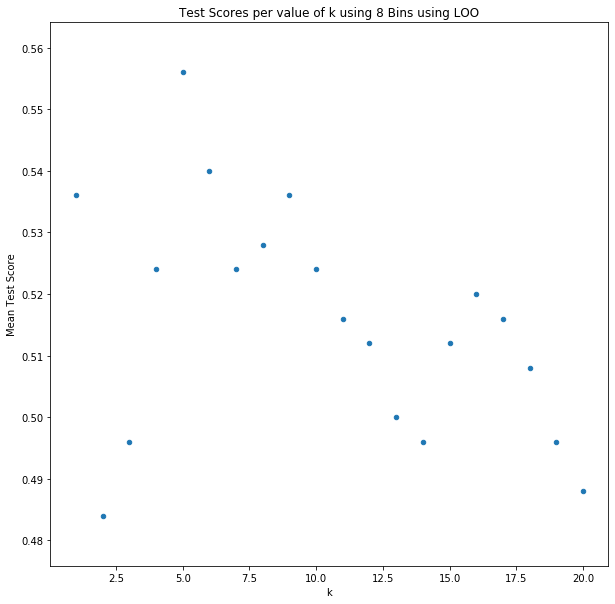

In [0]:
results8Bins.plot(x='k',y='Mean Test Score',kind='scatter',title='Test Scores per value of k using 8 Bins using LOO')

In [0]:
results8Bins

,k,Mean Test Score
1,5,0.556
2,6,0.540
3,1,0.536
4,9,0.536
5,8,0.528
6,7,0.524
7,10,0.524
8,4,0.524
9,16,0.520
10,11,0.516


In [0]:
cm_bin8 = confusion_matrix(Y_test_q4,gs8Binspred)
# Get class accuracy for downsample n=2
bin8Acc=pd.DataFrame(cm_bin8.diagonal() / cm_bin8.sum(axis=1))
ACCbin8 = pd.concat([bigC,bin8Acc],axis=1)
ACCbin8.columns =  ['Class', 'Accuracy']
ACCbin8

,Class,Accuracy
0,0,0.761905
1,1,1.000000
2,2,0.608696
3,3,0.151515
4,4,0.416667
5,5,0.391304
6,6,0.421053
7,7,0.652174
8,8,0.260870
9,9,0.277778


### Q4(c) Comment on testing results and query time of clf

# Question 5 (20 pts) 
a) Run your smart downsampler at n = 28. 
>Essentially, reduce each image down to 1 pixel by summing them all.   
>The motivation here is that an '8' will obviously have more dark pixels than a '1' 

b) Repeat the KNN LOO experiment. 

c) Comment on the testing results and the query time of the classifier.

### Q5(a) Smart downsampler using n = 28 

In [0]:
# subset original data with 28x28
# idx = 100 samples (idx = random.sample(range(1, 10000), 100))
X_train_q5 = X_Train[idx]
Y_train_q5 = Y_Train[idx]
X_test_q5 = X_Test[idx]
Y_test_q5 = Y_Test[idx]

In [0]:
# Smart downsample in to 28 bins
xTrain_bin28 = binning(X_train_q5,28)
xTest_bin28 = binning(X_test_q5,28)
xTrain_bin28.shape, xTest_bin28.shape,Y_train_q5.shape,Y_test_q5.shape

((250, 1, 1), (250, 1, 1), (250,), (250,))

In [0]:
# Reshape 28 bins
xTrain_bin28 = xTrain_bin28.reshape(250, 1)
xTest_bin28 = xTest_bin28.reshape(250, 1)
xTrain_bin28 = xTrain_bin28.astype('float32')
xTest_bin28 = xTest_bin28.astype('float32')
xTrain_bin28 /= 255
xTest_bin28 /= 255
print("Shape of Training using 28 bins: ", xTrain_bin28.shape)
print("Shape of Testing using 28 bins: ", xTest_bin28.shape)

Shape of Training using 28 bins:  (250, 1)
Shape of Testing using 28 bins:  (250, 1)


### Q5(b) Repeat k-NN LOO

In [0]:
%%time
gs28Bins_fit = gsLOO.fit(xTrain_bin28,Y_train_q5)

Fitting 250 folds for each of 20 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    2.9s


CPU times: user 3.61 s, sys: 37.8 ms, total: 3.65 s
Wall time: 8.52 s


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    8.3s finished


In [0]:
gs28Bins_fit.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [0]:
%%time
gs28Binspred = gs28Bins_fit.best_estimator_.predict(xTest_bin28)

CPU times: user 20.1 ms, sys: 0 ns, total: 20.1 ms
Wall time: 23.5 ms


In [0]:
results28Bins = pd.DataFrame(gs28Bins_fit.cv_results_).loc[:, ['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
results28Bins.index += 1
results28Bins['k'] = results28Bins.index
results28Bins = results28Bins[['k', 'mean_test_score']]
results28Bins.columns = ['k','Mean Test Score']
results28Bins.index = np.arange(1, len(results28Bins)+1)

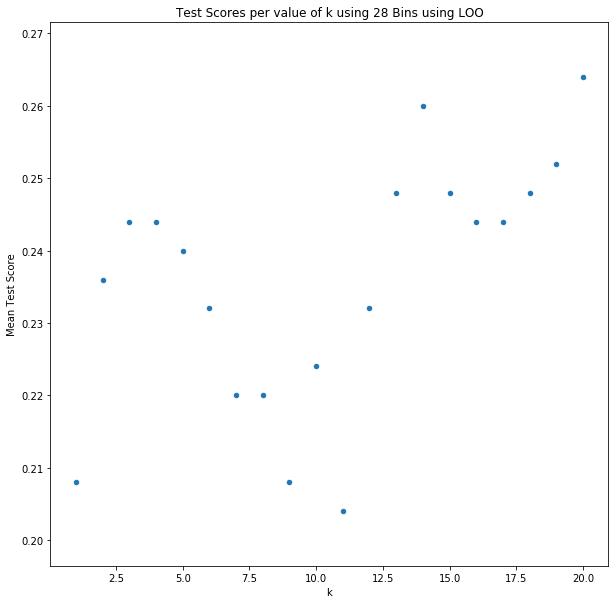

In [0]:
results28Bins.plot(x='k',y='Mean Test Score',kind='scatter',title='Test Scores per value of k using 28 Bins using LOO')

In [0]:
results28Bins

,k,Mean Test Score
1,20,0.264
2,14,0.260
3,19,0.252
4,18,0.248
5,15,0.248
6,13,0.248
7,3,0.244
8,4,0.244
9,17,0.244
10,16,0.244


In [0]:
cm_bin28 = confusion_matrix(Y_test_q5,gs28Binspred)
# Get class accuracy for downsample n=2
bin28Acc=pd.DataFrame(cm_bin28.diagonal() / cm_bin28.sum(axis=1))
ACCbin28 = pd.concat([bigC,bin28Acc],axis=1)
ACCbin28.columns =  ['Class', 'Accuracy']
ACCbin28

,Class,Accuracy
0,0,0.238095
1,1,0.916667
2,2,0.217391
3,3,0.090909
4,4,0.208333
5,5,0.086957
6,6,0.105263
7,7,0.173913
8,8,0.000000
9,9,0.000000


### Q5(c) Comment on the testing results and the query time of the clf

# Question 6 (30 pts)   
Do a little research of your own and develop a **feature transformation method** that you then use with the KNN leave-one-out experiment. 

Describe your method in detail, using equations and figures as necessary. Someone should be able to reproduce your results with your description. 

Comment on the testing results and the query time of the classifier.



Possible transformation methods:
>PCA  
>Independent Components Analysis (ICA)  
>Randome Components Analysis (RCA)  
>Linear Discrimant Analysis  
>QDA  
>RDA  


In [0]:
#PCA standardization
scaler_Xtrain = StandardScaler().fit_transform(X_train)
scaler_Xtest = StandardScaler().fit_transform(X_test)

In [0]:
#set pca to 95% 
pca = PCA(.95)

In [0]:
#fitting pca on training
pca.fit(scaler_Xtrain)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
#transform both training and testing
tf_Xtrain = pca.transform(scaler_Xtrain)
tf_Xtest = pca.transform(scaler_Xtest)

In [0]:
#looking at shape
tf_Xtrain.shape, tf_Xtest.shape

((60000, 331), (10000, 331))

In [0]:
#looking at shape
Y_Train.shape, Y_Test.shape

((60000,), (10000,))

In [0]:
random.seed(0)
# index for subset of data to test
idx = random.sample(range(1, 1000), 100) 
# create subsets
X_train_pca_loo = tf_Xtrain[idx]
Y_train_pca_loo = Y_Train[idx]
X_test_pca_loo = tf_Xtest[idx]
Y_test_pca_loo = Y_Test[idx]

In [0]:
n21 = range(1,21)
loo = LeaveOneOut()
gs_pca_params = {'n_neighbors': n21}
gs_pca_LOO = GridSearchCV(KNeighborsClassifier(),gs_pca_params,verbose = 1,cv = loo)

In [0]:
gs_pca_LOOfit = gs_pca_LOO.fit(X_train_pca_loo,Y_train_pca_loo)

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    5.3s finished


In [0]:
# Best Estimator k=2
gs_pca_LOOfit.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:
gs_pca_LOOpred = gs_pca_LOOfit.best_estimator_.predict(X_test_pca_loo)
gs_pca_LOOpred

array([3, 3, 1, 3, 1, 4, 0, 1, 3, 0, 9, 7, 4, 1, 0, 1, 3, 9, 8, 1, 1, 6,
       1, 5, 7, 4, 0, 4, 3, 1, 0, 0, 0, 1, 7, 3, 3, 0, 3, 9, 3, 3, 0, 0,
       0, 4, 3, 3, 1, 0, 0, 7, 0, 5, 4, 1, 1, 9, 3, 6, 1, 7, 7, 9, 0, 1,
       0, 0, 1, 7, 0, 0, 8, 5, 1, 4, 1, 1, 1, 1, 9, 7, 3, 0, 2, 4, 1, 1,
       1, 1, 2, 8, 1, 9, 0, 1, 9, 7, 5, 4], dtype=uint8)

In [0]:
results_pca = pd.DataFrame(gs_pca_LOOfit.cv_results_).loc[:, ['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
results_pca.index += 1
results_pca['k'] =results_pca.index
results_pca = results_pca[['k', 'mean_test_score']]
results_pca.columns = ['k','Mean Test Score']
results_pca.index = np.arange(1, len(results_pca)+1)

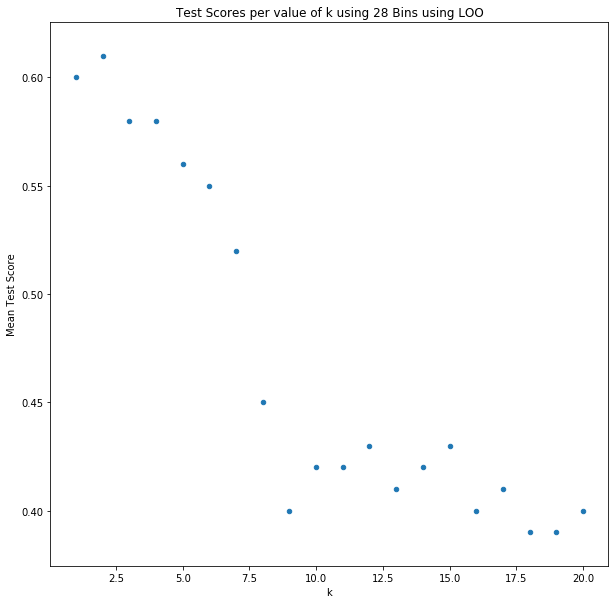

In [0]:
results_pca.plot(x='k',y='Mean Test Score',kind='scatter',title='Test Scores ')

In [0]:
results_pca

,k,Mean Test Score
1,2,0.61
2,1,0.60
3,3,0.58
4,4,0.58
5,5,0.56
6,6,0.55
7,7,0.52
8,8,0.45
9,15,0.43
10,12,0.43
